# Regression

Regression analysis is one of the most common techniques used to make predictions. Depending on the question we would like to answer, and the format of the outcome variable, regression analysis can be used to both make value predictions (what will my income be next year?) and classifications (based on the qualities of a song, will I like it or not?)

In [1]:
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('data/Fitbit2.csv') 
df.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


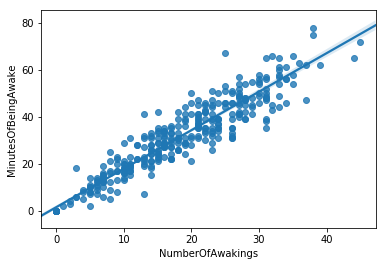

In [3]:
sns.regplot(x="NumberOfAwakings", y="MinutesOfBeingAwake", data=df);

## Traditional Analysis

In [3]:
!pip install scipy

In [5]:
from scipy import stats

X = df['NumberOfAwakings']
y = df['MinutesOfBeingAwake']

slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

print(f'The slope is: {slope}')
print(f'The intercept is: {intercept}')
print(f'The coefficient of determination is: {r_value ** 2}')

The slope is: 1.6405141436199793
The intercept is: 1.4381033523783202
The coefficient of determination is: 0.9059552749155961


https://en.wikipedia.org/wiki/Coefficient_of_determination

In [6]:
predictions = [intercept + slope * x for x in X]

predictions[:5]

[39.16992865563785,
 35.888900368397884,
 42.4509569428778,
 35.888900368397884,
 73.62072567165741]

## scikit-learn

In [7]:
!pip install sklearn

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
X = df['NumberOfAwakings'].values.reshape(len(df),1)
y = df['MinutesOfBeingAwake'].values

reg = LinearRegression().fit(X, y)

print(f'The slope is: {reg.coef_[0]}')
print(f'The intercept is: {reg.intercept_}')
print(f'The coefficient of determination is: {reg.score(X, y)}')

The slope is: 1.64051414361998
The intercept is: 1.4381033523783096
The coefficient of determination is: 0.9059552749155962


In [10]:
predictions = reg.predict(X)

predictions[:5]

array([39.16992866, 35.88890037, 42.45095694, 35.88890037, 73.62072567])

In [12]:
predictions = [(x[0], reg.intercept_ + reg.coef_[0] * x[0]) for x in X]

predictions[:5]

[(23, 39.16992865563785),
 (21, 35.888900368397884),
 (25, 42.45095694287781),
 (21, 35.888900368397884),
 (44, 73.62072567165742)]

In [13]:
1.4381033523783096 + 1.64051414361998 * 23

39.16992865563785